#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 05
**CH05A What Likelihood of Loss to Expect on a Stock Portfolio?**

using the sp500 dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from scipy import stats
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [2]:
sp500 = pd.read_csv("/workspaces/codespaces-jupyter/data/SP500_2006_16_data.csv")
sp500

,DATE,VALUE
0,2006-08-25,1295.09
1,2006-08-28,1301.78
2,2006-08-29,1304.28
3,2006-08-30,1304.27
4,2006-08-31,1303.82
...,...,...
2606,2016-08-22,2182.64
2607,2016-08-23,2186.90
2608,2016-08-24,2175.44
2609,2016-08-25,2172.47


In [3]:
sp500 = sp500.replace("", np.nan).replace("#N/A", np.nan).dropna().reset_index(drop=True)

Create percent return

In [4]:
#Fractional change between the current and a prior element. Examples below
sp500["pct_return"] = sp500["VALUE"].pct_change() * 100

In [5]:
#Fractial change in action
s = pd.Series([90, 91, None, 85])
s.ffill().pct_change()

0         NaN
1    0.011111
2    0.000000
3   -0.065934
dtype: float64

Create date variables (we dont use these though)

In [6]:
sp500["DATE"] = pd.to_datetime(sp500["DATE"], format="%Y-%m-%d")
sp500["year"] = sp500["DATE"].dt.year
sp500["month"] = sp500["DATE"].dt.month
sp500["yearmonth"] = sp500["year"] * 100 + sp500["month"]

In [7]:
sp500

,DATE,VALUE,pct_return,year,month,yearmonth
0,2006-08-25,1295.09,NaN,2006,8,200608
1,2006-08-28,1301.78,0.516566,2006,8,200608
2,2006-08-29,1304.28,0.192045,2006,8,200608
3,2006-08-30,1304.27,-0.000767,2006,8,200608
4,2006-08-31,1303.82,-0.034502,2006,8,200608
...,...,...,...,...,...,...
2514,2016-08-22,2182.64,-0.056322,2016,8,201608
2515,2016-08-23,2186.90,0.195176,2016,8,201608
2516,2016-08-24,2175.44,-0.524029,2016,8,201608
2517,2016-08-25,2172.47,-0.136524,2016,8,201608


In [8]:
sp500["pct_return"].describe()

count    2518.000000
mean        0.029145
std         1.315438
min        -9.034980
25%        -0.453734
50%         0.070897
75%         0.582782
max        11.580036
Name: pct_return, dtype: float64

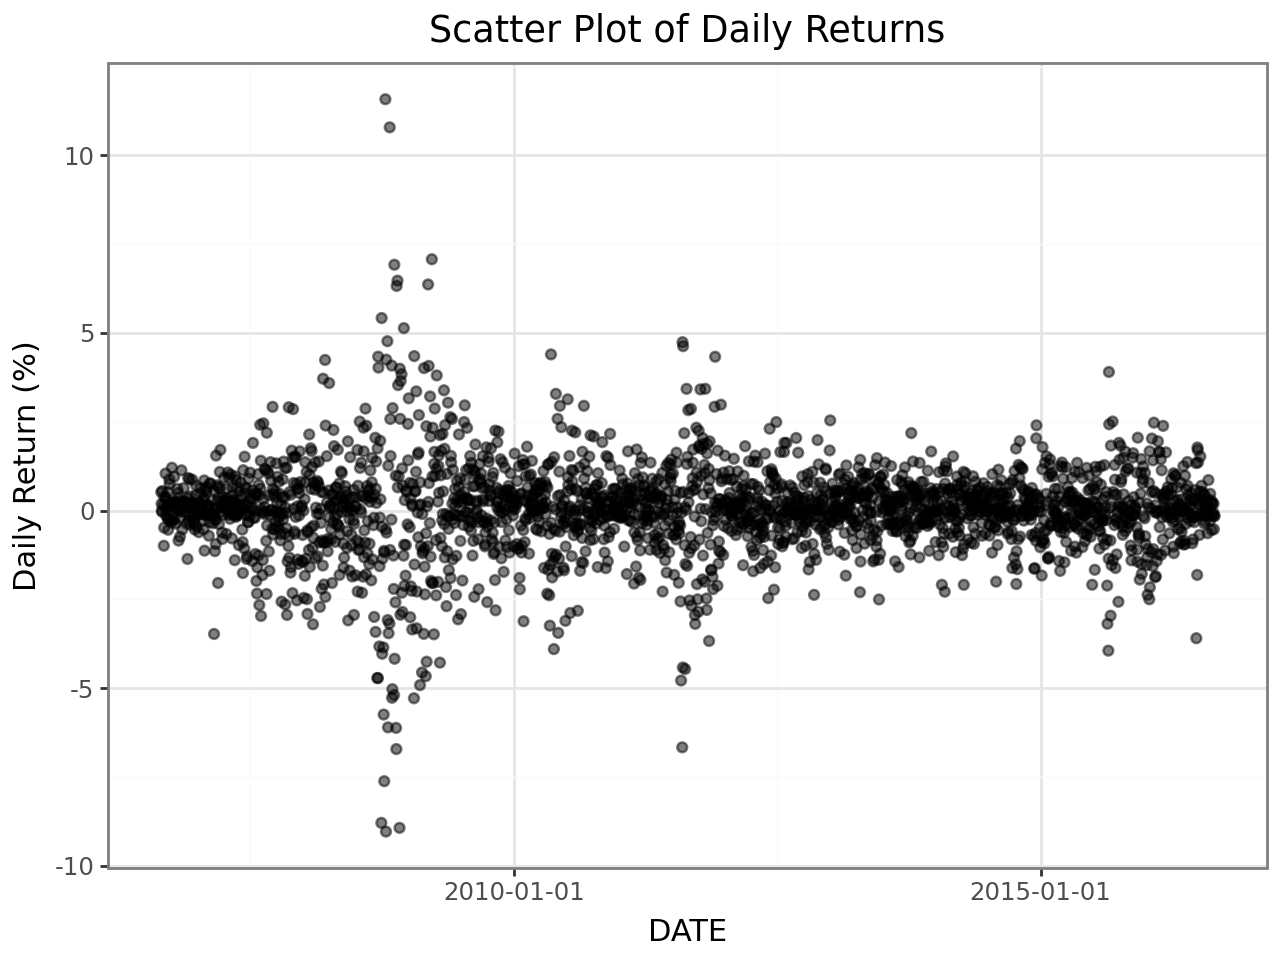

In [9]:
(
    ggplot(sp500, aes(x="DATE", y="pct_return"))
    + geom_point(alpha=0.5)
    + labs(x="DATE", y="Daily Return (%)", title="Scatter Plot of Daily Returns")
    + theme_bw()
)


### Figure 5.1 Histogram of daily returns in the entire data

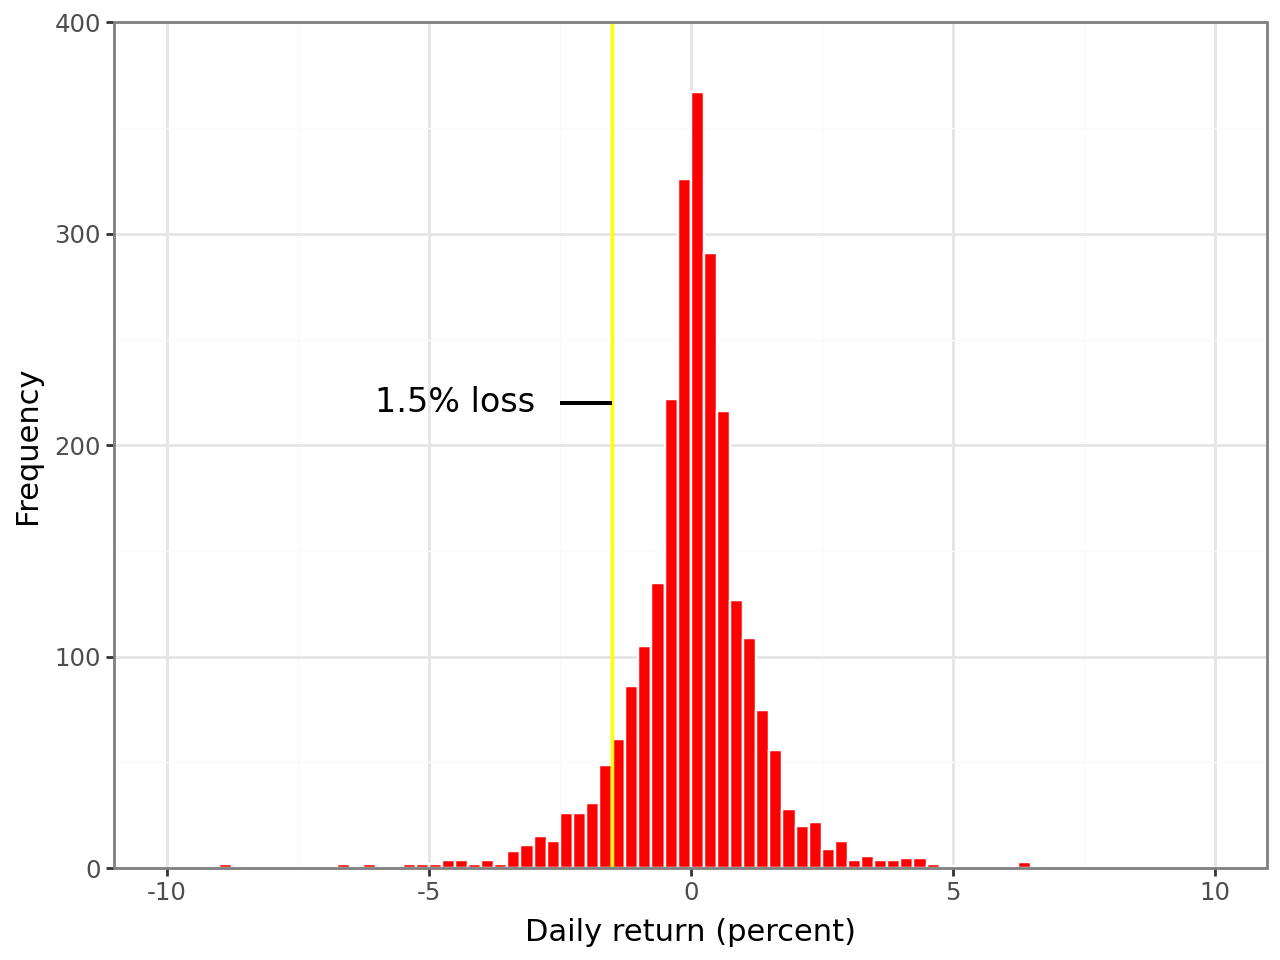

In [10]:
(
    ggplot(sp500, aes("pct_return"))
    + geom_histogram(
        binwidth=0.25, color="white", fill="red", boundary=0, closed="left"
    )
    + geom_vline(xintercept=-1.5, size=0.7, color="yellow")
    + labs(x="Daily return (percent)", y="Frequency")
    + coord_cartesian(xlim=[-10, 10], ylim=[0, 400])
    + scale_y_continuous(expand=[0, 0])
    + geom_segment(aes(x=-2.5, y=220, xend=-1.5, yend=220))
    + annotate("text", x=-4.5, y=220, label="1.5% loss", size=12)
    + theme_bw()
)


In [11]:
sp500["pct_return"].describe()

count    2518.000000
mean        0.029145
std         1.315438
min        -9.034980
25%        -0.453734
50%         0.070897
75%         0.582782
max        11.580036
Name: pct_return, dtype: float64

In [12]:
sp500max=sp500.loc[sp500["pct_return"].idxmax()]
sp500max

DATE          2008-10-13 00:00:00
VALUE                     1003.35
pct_return              11.580036
year                         2008
month                          10
yearmonth                  200810
Name: 536, dtype: object

In [13]:
sp500.count()
sp500
sp500less5 = sp500.loc[sp500["pct_return"] < -1.5].reset_index(drop=True)
sp500less5["pct_return_decimal"] = sp500less5["pct_return"] / 100
sp500less5

,DATE,VALUE,pct_return,year,month,yearmonth,pct_return_decimal
0,2007-02-27,1399.04,-3.472543,2007,2,200702,-0.034725
1,2007-03-13,1377.95,-2.036826,2007,3,200703,-0.020368
2,2007-06-07,1490.72,-1.756976,2007,6,200706,-0.017570
3,2007-07-24,1511.04,-1.980449,2007,7,200707,-0.019804
4,2007-07-26,1482.66,-2.333854,2007,7,200707,-0.023339
...,...,...,...,...,...,...,...
205,2016-01-25,1877.08,-1.563795,2016,1,201601,-0.015638
206,2016-02-02,1903.03,-1.874310,2016,2,201602,-0.018743
207,2016-02-05,1880.05,-1.848130,2016,2,201602,-0.018481
208,2016-06-24,2037.41,-3.591978,2016,6,201606,-0.035920


In [14]:
sp500less5['DATE'].min(), sp500less5['DATE'].max()

(Timestamp('2007-02-27 00:00:00'), Timestamp('2016-06-27 00:00:00'))

In [15]:
sp500less5["pct_return"].mean()

np.float64(-2.645619715165872)

In [16]:
true_share = (sp500["pct_return"] <= -1.5).mean()
print(true_share)

0.0833664152441445


### Figure 5.2 prep

 Create 10 000 samples, with 500 and 1000 observations in each sample, taken from sp500["pct_return"]

In every sample: for each observation, check if it is a loss of 5% or more. Then calculate the percentage of observations out of 500 or 1000 where the loss exceeds 5%. 

In [17]:
n_samples = 10000  # Define the number of samples

# For n=1000
samples_1000 = np.random.choice(sp500["pct_return"].dropna(), size=(n_samples, 1000), replace=True)
a=samples_1000 < -5

nobs_1000 = np.mean(samples_1000 < -1.5, axis=1)

# For n=500
samples_500 = np.random.choice(sp500["pct_return"].dropna(), size=(n_samples, 500), replace=True)
nobs_500 = np.mean(samples_500 < -1.5, axis=1)


In [18]:
a = pd.DataFrame(a)
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
nobs_df = pd.DataFrame({"nobs_500": nobs_500, "nobs_1000": nobs_1000})*100

In [20]:
a = pd.DataFrame(samples_1000).T
a

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-1.509783,-0.885378,0.100913,0.214694,1.294319,-0.955717,-0.051669,-0.165159,0.016048,1.263409,...,0.233789,1.504624,0.175445,-0.537876,0.523029,-0.573672,-0.168633,-0.326134,-0.809641,1.094876
1,1.110793,0.857583,0.256373,1.908060,-3.088921,0.775933,0.880285,-1.419600,-0.130393,1.349206,...,-1.532958,-0.685159,0.756733,1.904029,0.912008,0.674396,2.982536,0.053358,0.247780,0.718905
2,-0.574639,-2.030872,0.367975,0.251168,-1.360110,-2.555675,-0.274049,0.236225,-3.000963,0.733654,...,0.318321,-0.291354,-0.783096,1.667194,0.834087,-0.453356,1.097604,0.034955,-1.537018,1.487500
3,-1.011294,-4.662014,-0.060609,-0.163662,0.005000,1.261175,1.067551,-2.116273,-1.141295,2.401522,...,2.950677,1.445421,1.068834,0.668050,0.509527,0.697475,-0.078239,0.717460,1.549355,-0.269053
4,0.568726,0.427030,-0.702321,0.407601,-2.909263,-0.037227,-0.400447,0.006355,-0.073496,0.221374,...,0.233789,0.037850,0.192045,0.260329,-3.441147,1.059274,-0.130351,1.407182,-3.481874,-0.054408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.455417,0.450414,0.080858,-0.468698,-3.413815,-1.646792,-0.588736,1.204240,-0.806733,-2.159909,...,0.596724,0.778506,1.415836,0.422095,0.184855,0.048817,0.161521,0.649472,-0.339734,0.277370
996,0.448704,-1.059788,0.620626,0.156926,0.082828,-1.145103,-0.470105,1.187057,-2.455154,1.669594,...,0.737754,2.493374,-1.187146,0.720392,-0.030327,0.781713,0.000000,0.633354,-0.038268,1.380637
997,-0.876577,-1.320240,-0.973388,-2.501028,0.918444,0.005438,-0.737379,-2.159909,0.310587,0.568323,...,-0.698956,-0.614777,-1.108520,1.677226,-0.072896,-0.119632,-0.566092,-0.845164,-2.130302,-0.268988
998,2.924042,0.427030,0.034269,-0.026972,-0.940764,0.889966,0.325817,0.466566,-0.057990,-0.312464,...,0.139503,0.811426,-0.212098,0.405142,-0.588501,-0.613166,0.493869,-0.030807,-0.281678,-1.471928


In [21]:
nobs_df

,nobs_500,nobs_1000
0,9.0,8.9
1,10.0,9.4
2,8.0,9.1
3,4.8,8.9
4,8.6,7.9
...,...,...
9995,8.2,8.2
9996,9.0,8.9
9997,8.0,8.2
9998,8.8,9.8


In [22]:
error = (
    norm.ppf(0.975) * np.std(nobs_df["nobs_1000"]) / np.sqrt(len(nobs_df["nobs_1000"]))
)
left = np.mean(nobs_df["nobs_1000"]) - error
right = np.mean(nobs_df["nobs_1000"]) + error


### Figure 5.2

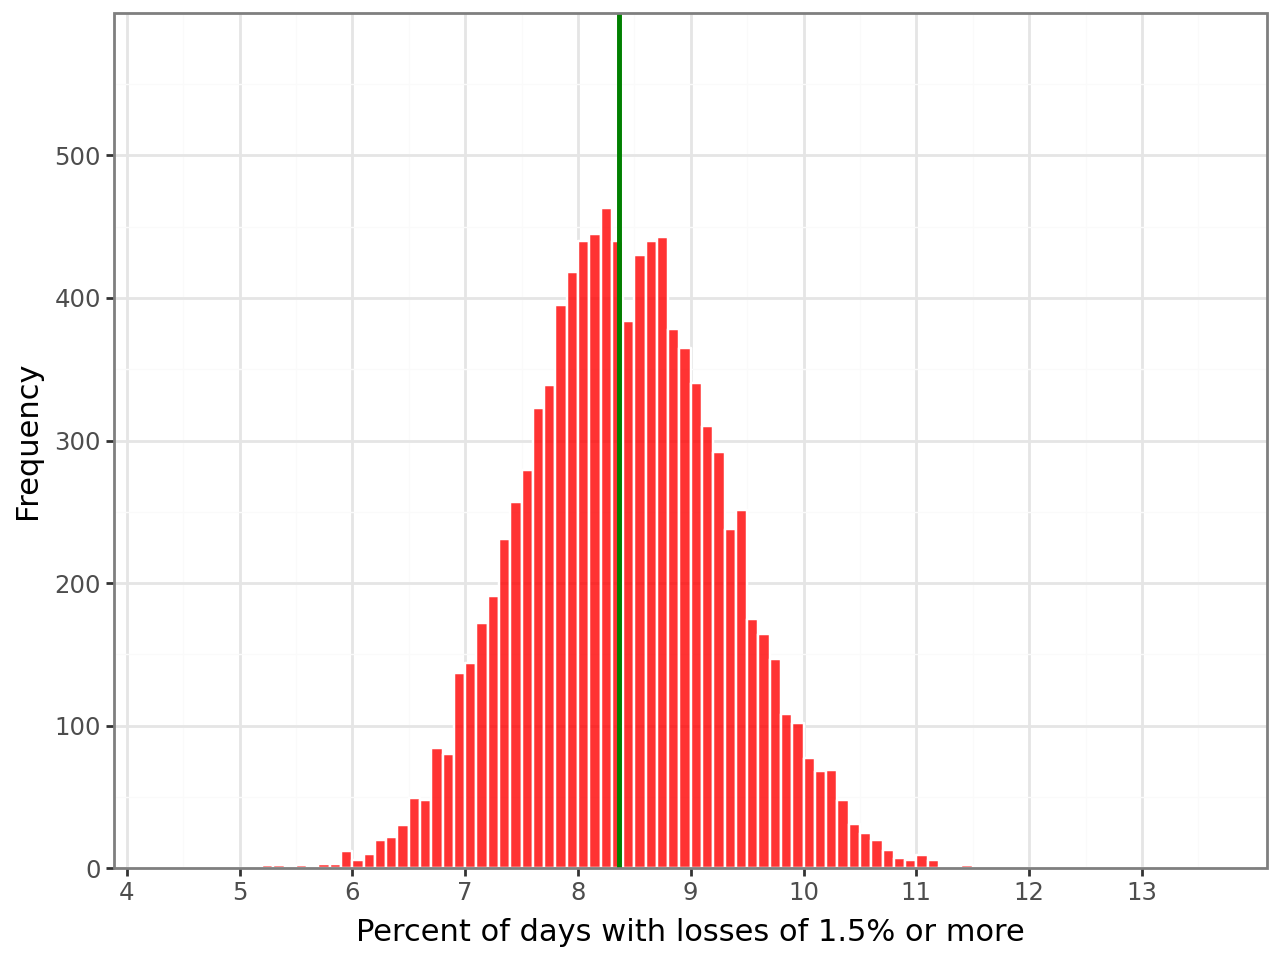

In [23]:
(
    ggplot(nobs_df, aes("nobs_1000"))
    + geom_histogram(
        binwidth=0.1,
        color="white",
        fill="red",
        alpha=0.8,
        center=0.75,
        closed="left",
    )
    + labs(x="Percent of days with losses of 1.5% or more", y="Frequency")
    + geom_vline(aes(xintercept=nobs_df["nobs_1000"].mean()), color="green", size=1)
    + coord_cartesian(xlim=[4, 14], ylim=(0, 600))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4,14), breaks=np.arange(4, 14, 1))
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 600), breaks=np.arange(0, 600, 100)
    )
    + geom_segment(aes(x=0.8, y=2000, xend=0.52, yend=2000))
    + annotate("text", x=0.9, y=2000, label="Mean", size=12)
    + theme_bw()
)

In [24]:
nobs_df["nobs_1000"].std()

np.float64(0.8776293826743344)

In [25]:
nobs_df["nobs_500"].std()

np.float64(1.2266434669534183)

In [26]:
nobs_df["nobs_1000"].mean()

np.float64(8.3613)

In [27]:
nobs_df["nobs_500"].mean()

np.float64(8.35052)

### Figure 5.3 

Not working with epanechnikov kernel

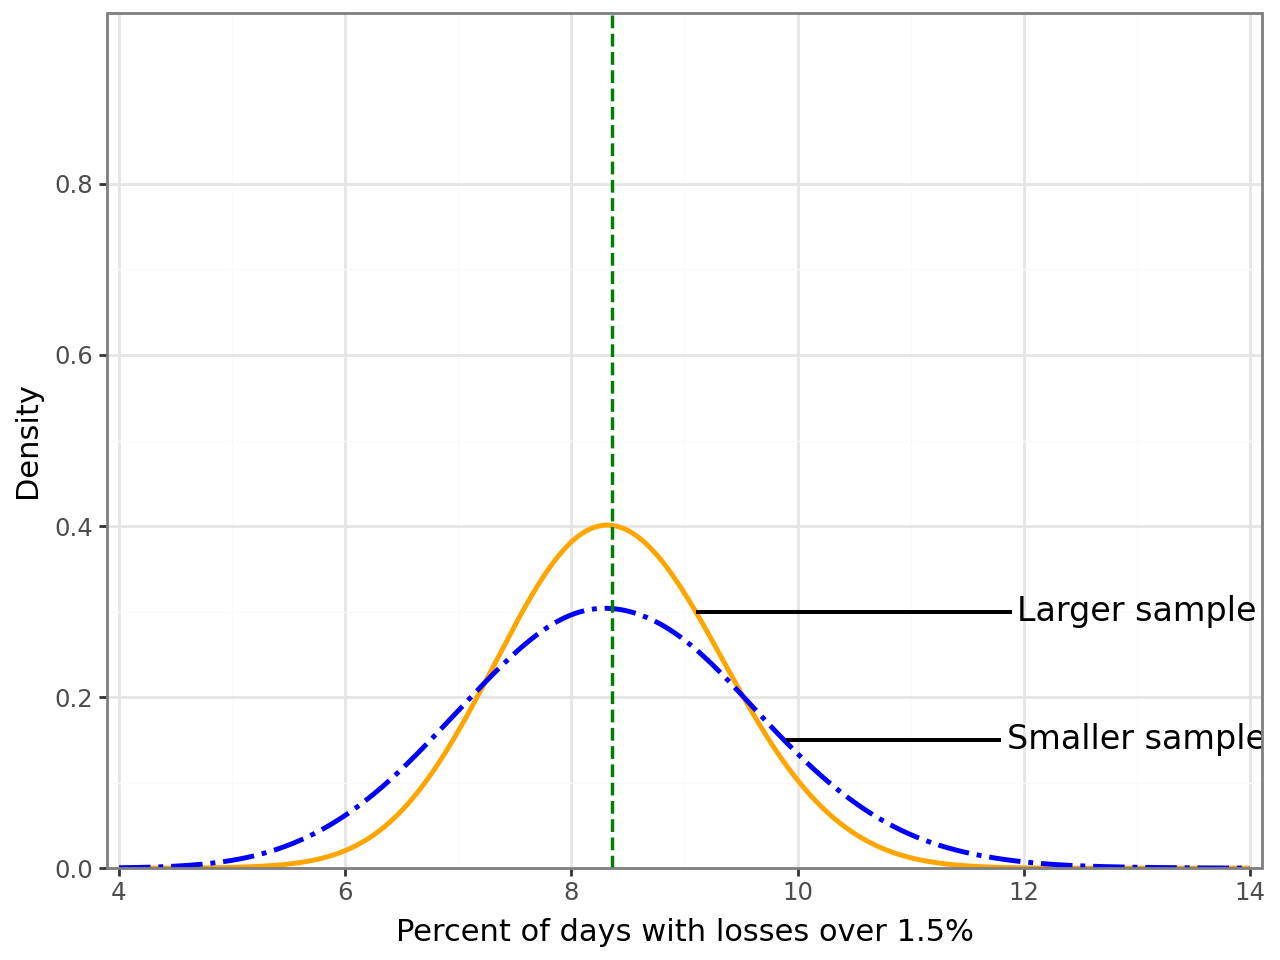

In [28]:
(
    ggplot(nobs_df)
    + stat_density(aes(x="nobs_1000"), color="orange", geom="line", bw=0.45, size=1)
    + stat_density(aes(x="nobs_500"), color="blue", geom="line", bw=0.45, linetype="dashdot", size=1)
    + labs(x="Percent of days with losses over 1.5%", y="Density")
    + geom_vline(xintercept=nobs_df["nobs_1000"].mean(), color="green", size=0.7, linetype="dashed")
    + geom_segment(aes(x=11.9, y=0.3, xend=9.1, yend=0.3), size=0.5)
    + annotate("text", x=13, y=0.3, label="Larger sample", size=12)
    + geom_segment(aes(x=11.8, y=0.15, xend=9.9, yend=0.15), size=0.5)
    + annotate("text", x=13, y=0.15, label="Smaller sample", size=12)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(4, 15, 2))
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 1), breaks=np.arange(0, 1, 0.2))
    + theme_bw()
    + theme(
        legend_position="none",
    )
)

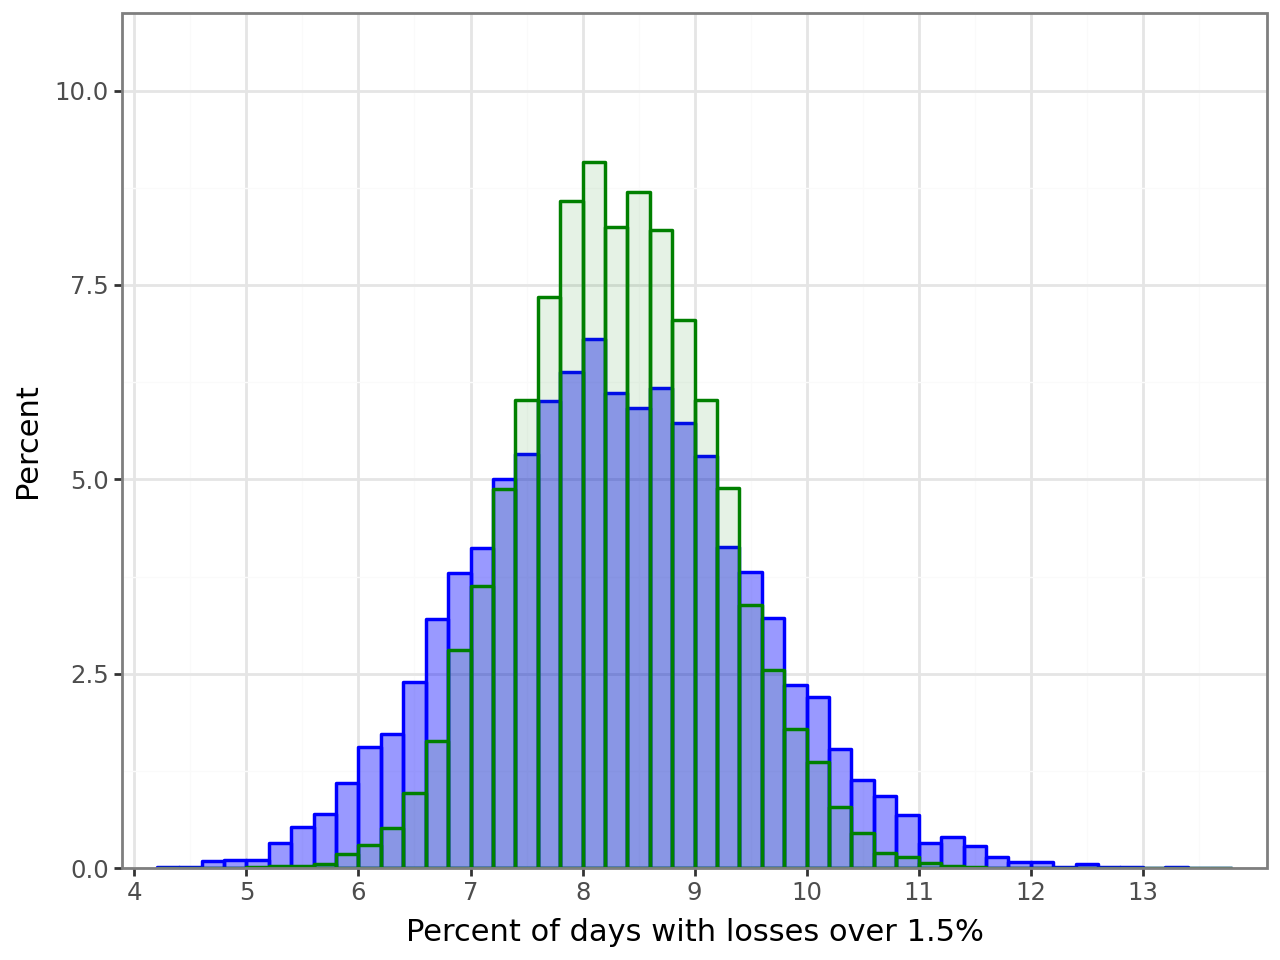

In [29]:
(
    ggplot(nobs_df)
    + geom_histogram(
        aes(x="nobs_500", y="stat(count)/sum(stat(count))*100"),
        color="blue",
        fill="blue",
        binwidth=0.2,
        center=0.5,
        size=0.7,
        alpha=0.4,
        closed="left",
    )
    + geom_histogram(
        aes(x="nobs_1000", y="stat(count)/sum(stat(count))*100"),
        color="green",
        fill="green",
        binwidth=0.2,
        center=0.5,
        alpha=0.1,
        size=0.7,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Percent of days with losses over 1.5%")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(0, 14, 1)
    )
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 11))
    + scale_color_manual(
        labels=("N = 1000", "N = 500"), name="", values=("blue", "green")
    )
    + scale_alpha_identity()
    + scale_fill_identity()
    + theme_bw()
    + theme(
        legend_direction="horizontal",
    )
)


Create bootstrap samples

In [30]:
bootstrap_samples = np.random.choice(
    sp500["pct_return"].dropna(),
    size=(10000, len(sp500["pct_return"].dropna())),
    replace=True
)

In [31]:
pd.DataFrame(bootstrap_samples).T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-1.359543,2.630214,0.103759,1.042221,1.219218,-2.278472,0.008088,-0.159352,0.459808,0.357054,...,-0.409251,-0.324048,-3.114064,0.660874,0.484354,-0.527787,2.160999,-0.039469,-1.020921,-1.150112
1,-0.134713,0.173855,0.335440,-0.208558,0.218848,-1.245438,1.094876,0.459980,0.520280,0.176142,...,0.136390,0.284431,0.923515,0.232928,-0.971183,-0.000767,-1.020249,0.088500,-0.057497,0.225139
2,-0.547439,0.363128,0.053182,-0.048342,-1.090125,0.079372,1.788835,0.008369,-0.000767,-1.894485,...,-1.264914,-0.168633,0.425188,-2.561555,0.135458,1.081468,0.573119,0.000669,0.792802,1.788835
3,1.373952,-2.278912,-0.848902,-2.278912,-1.605349,2.028368,0.119608,-0.141700,-0.547439,0.187121,...,1.330191,-0.738777,0.062083,0.785318,-0.093951,-0.012820,-2.278912,0.404152,-1.859655,-1.587196
4,-0.001491,2.581761,0.608094,-0.959285,0.560302,0.159753,-2.052851,0.368634,0.113021,-1.002371,...,0.083671,-0.867673,0.544547,0.110574,1.679735,1.263409,-1.693537,1.689053,-4.278979,2.386879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,3.994070,-1.612650,0.109509,0.473457,0.956596,-3.079968,0.379840,-0.038268,-0.129493,-1.502095,...,-0.035113,0.573119,0.556096,4.240953,1.143155,0.304995,0.483726,-0.455183,0.168430,4.025661
2514,0.006355,-0.806733,-1.415388,0.313530,-0.026502,-0.026502,0.224428,-0.077849,-0.370400,0.705324,...,0.949723,0.897959,0.176662,0.242597,-0.847823,-0.699430,0.339712,-0.164659,-0.095005,-1.171730
2515,-0.018896,-0.171230,1.549355,-0.125189,-0.803497,-0.136176,-1.120033,-0.222958,1.492297,0.224428,...,-1.675761,-0.301145,2.349421,-1.145103,-2.151244,-2.277616,-3.176432,0.861606,0.066878,-0.308539
2516,-0.758921,-0.551078,-0.886334,-0.227667,-0.508955,-0.801333,-4.713590,-0.708888,0.226379,1.616238,...,0.035393,0.211889,-0.572302,-0.050355,0.127748,0.096789,-0.337932,0.964453,0.137484,-0.388354


Calculate percent of days wit losses over  thresholds from -1 to 10

In [32]:
bootstrap_loss_results_1_5 = pd.DataFrame(
    [
        np.mean(bootstrap_samples < -pct_loss, axis=1) * 100
        for pct_loss in np.arange(1.5, 11, 1)
    ],
    index=[f"loss{pct_loss}" for pct_loss in np.arange(1.5, 11, 1)],
).T

In [33]:
bootstrap_loss_results_1_5

,loss1.5,loss2.5,loss3.5,loss4.5,loss5.5,loss6.5,loss7.5,loss8.5,loss9.5,loss10.5
0,7.982526,3.494837,1.350278,0.913423,0.476569,0.317712,0.119142,0.119142,0.0,0.0
1,8.459095,2.819698,1.231136,0.754567,0.357427,0.158856,0.119142,0.079428,0.0,0.0
2,9.015091,3.137411,1.231136,0.873709,0.436855,0.277998,0.238284,0.158856,0.0,0.0
3,7.783956,3.097697,1.151708,0.675139,0.476569,0.357427,0.198570,0.158856,0.0,0.0
4,9.451946,3.653693,1.310564,0.675139,0.198570,0.119142,0.079428,0.079428,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,9.054805,3.216839,1.151708,0.675139,0.317712,0.277998,0.158856,0.119142,0.0,0.0
9996,8.975377,3.177125,1.270850,0.873709,0.476569,0.238284,0.198570,0.119142,0.0,0.0
9997,7.982526,3.057983,1.350278,0.873709,0.357427,0.198570,0.198570,0.158856,0.0,0.0
9998,8.856235,3.137411,1.111994,0.714853,0.277998,0.158856,0.039714,0.039714,0.0,0.0


Plot percent of days with losses over -5%

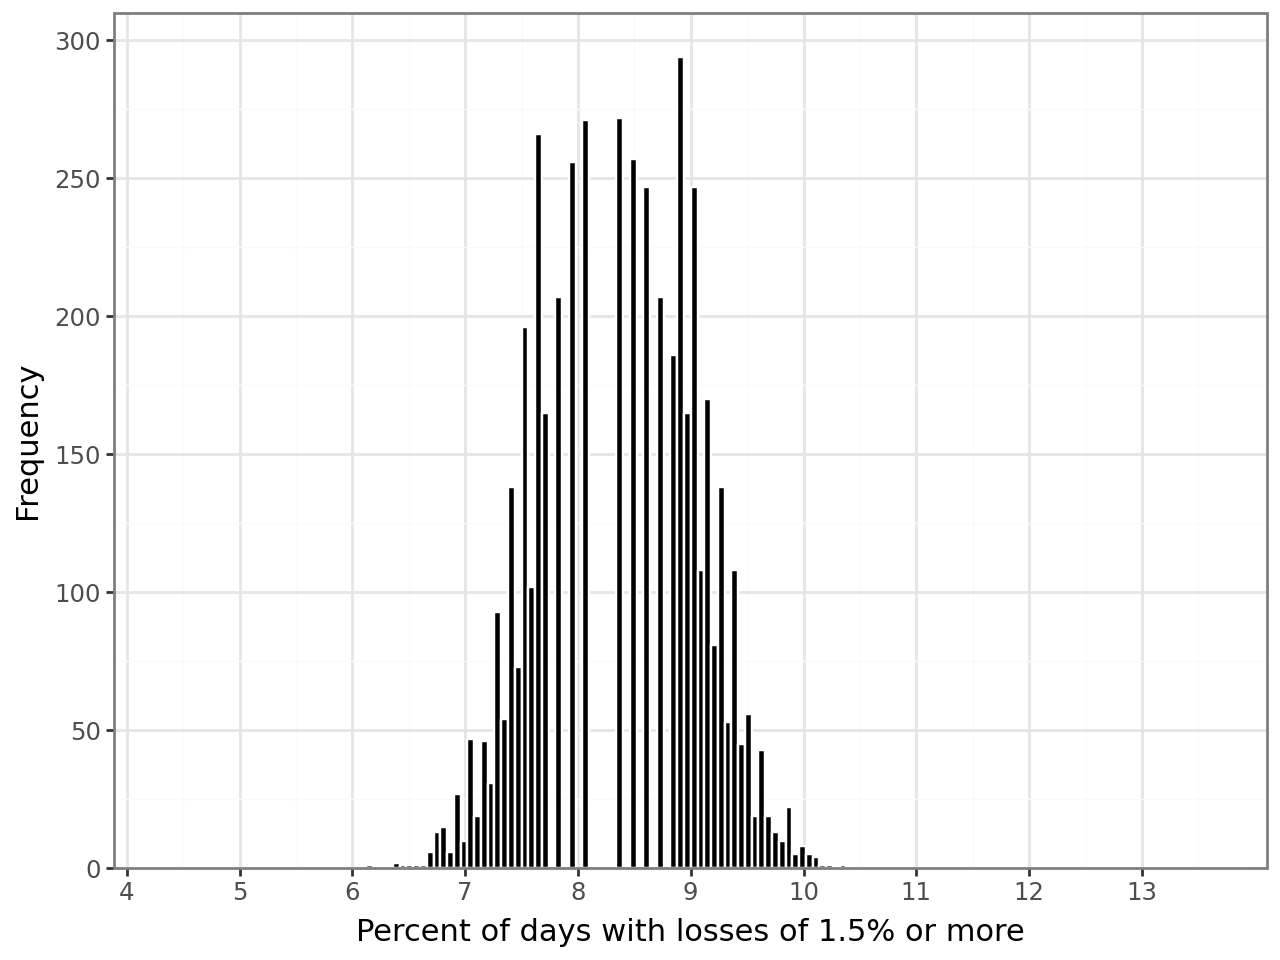

In [34]:
(
    ggplot(bootstrap_loss_results_1_5, aes("loss1.5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.06, boundary=0, closed="left"
    )
    + scale_y_continuous(expand=(0, 0), limits=(0, 310), breaks=np.arange(0, 310, 50))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(4, 14, 1))
    + labs(x="Percent of days with losses of 1.5% or more", y="Frequency")
    + theme_bw()
)


In [35]:
bootstrap_loss_results_1_5["loss1.5"].std()

np.float64(0.5534355176454748)

In [36]:
mean_loss15 = bootstrap_loss_results_1_5["loss1.5"].mean()
se_bootstrap = bootstrap_loss_results_1_5["loss1.5"].std()
ci_lower_se = mean_loss5 - 2 * se_bootstrap
ci_upper_se = mean_loss5 + 2 * se_bootstrap

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

NameError: name 'mean_loss5' is not defined

In [ ]:
# Assuming bootstrap_loss_results["loss5"] is a Series of bootstrap results
ci_lower = bootstrap_loss_results["loss5"].quantile(0.025)
ci_upper = bootstrap_loss_results["loss5"].quantile(0.975)

print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% Confidence Interval: [0.2780, 0.7943]


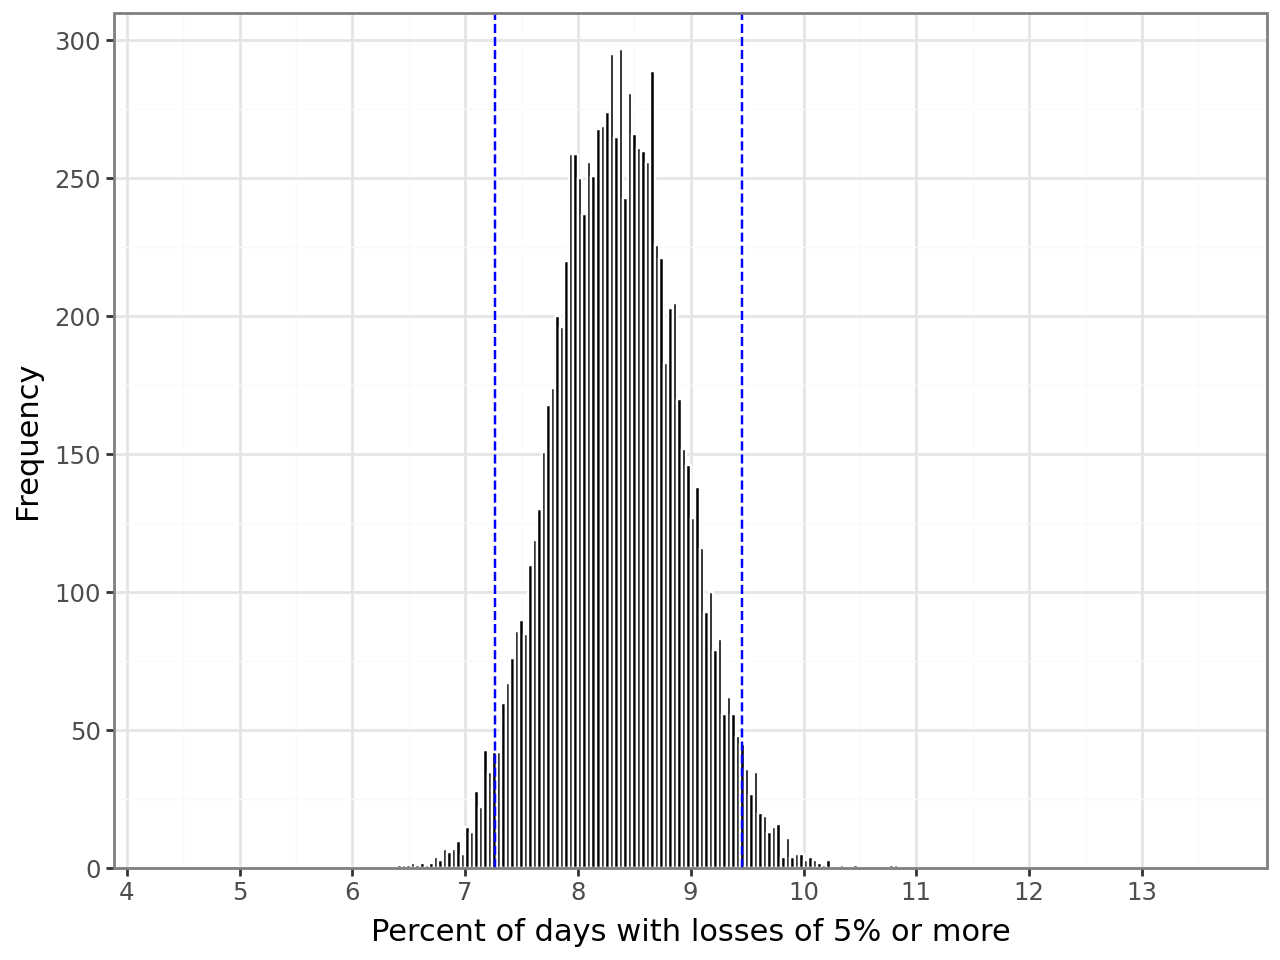

In [ ]:
from plotnine import geom_vline, annotate

ci_lower = bootstrap_loss_results_1_5["loss1.5"].quantile(0.025)
ci_upper = bootstrap_loss_results_1_5["loss1.5"].quantile(0.975)

(
    ggplot(bootstrap_loss_results_1_5, aes("loss1.5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + geom_vline(xintercept=ci_lower, color="blue", linetype="dashed")
    + geom_vline(xintercept=ci_upper, color="blue", linetype="dashed")
    + annotate("text", x=ci_lower + 0.02, y=1150, label=f"2.5% = {ci_lower:.2f}", size=10)
    + annotate("text", x=ci_upper - 0.06, y=1150, label=f"97.5% = {ci_upper:.2f}", size=10)
    + scale_y_continuous(expand=(0, 0), limits=(0, 310), breaks=np.arange(0, 310, 50))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(4, 14, 1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


## Standard Error

In [ ]:
sp500.count()

DATE          2519
VALUE         2519
pct_return    2518
year          2519
month         2519
yearmonth     2519
dtype: int64

In [ ]:
ncov = round(1 / np.sqrt(sp500.count()),2)
ncov

DATE          0.02
VALUE         0.02
pct_return    0.02
year          0.02
month         0.02
yearmonth     0.02
dtype: float64

In [ ]:
# Calculate the indicator for loss > 5%
loss_indicator = (sp500["pct_return"] <= -5).dropna()
std_loss5 = loss_indicator.std(ddof=1)
print(f"Standard deviation of loss5 indicator: {std_loss5:.4f}")


Standard deviation of loss5 indicator: 0.0717


In [ ]:
SE=std_loss5 *ncov
SE=SE*100
SE

DATE          0.143334
VALUE         0.143334
pct_return    0.143334
year          0.143334
month         0.143334
yearmonth     0.143334
dtype: float64

### Compare with we got from bootstrap

In [ ]:
std_loss5 = bootstrap_loss_results_1_5["loss1.5"].std()
print(f"Standard deviation of fraction of 1.5%+ loss: {std_loss5}")

Standard deviation of fraction of 5%+ loss: 0.5538254280072883


### And just to calc a Confidence Interval for original dataset sp500

In [ ]:
from scipy.stats import norm

mean_loss5_or = loss_indicator.mean()
std_loss5_or = loss_indicator.std(ddof=1)
n = loss_indicator.count()
se = std_loss5_or / np.sqrt(n)
z = norm.ppf(0.975)  # 1.96 for 95% CI

ci_lower =round((mean_loss5_or - z * se)*100,1)
ci_upper =round((mean_loss5_or + z * se)*100,1)

print(f"95% Confidence Interval: [{ci_lower:.1f}, {ci_upper:.1f}]")


95% Confidence Interval: [0.2, 0.8]


In [ ]:
std_loss5.std()

np.float64(0.0)

## t_statistics

In [ ]:
# calc mean
mean=-round(sp500["pct"].mean(),3)
mean

In [ ]:
sp500

,DATE,VALUE,pct_return,year,month,yearmonth
0,2006-08-25,1295.09,NaN,2006,8,200608
1,2006-08-28,1301.78,0.516566,2006,8,200608
2,2006-08-29,1304.28,0.192045,2006,8,200608
3,2006-08-30,1304.27,-0.000767,2006,8,200608
4,2006-08-31,1303.82,-0.034502,2006,8,200608
...,...,...,...,...,...,...
2514,2016-08-22,2182.64,-0.056322,2016,8,201608
2515,2016-08-23,2186.90,0.195176,2016,8,201608
2516,2016-08-24,2175.44,-0.524029,2016,8,201608
2517,2016-08-25,2172.47,-0.136524,2016,8,201608
